# Bootstrap

https://medium.com/me/stories/drafts

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ссылки" data-toc-modified-id="Ссылки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ссылки</a></span></li><li><span><a href="#init" data-toc-modified-id="init-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>init</a></span></li><li><span><a href="#defs" data-toc-modified-id="defs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>defs</a></span></li><li><span><a href="#Генеральная-совокупность-для-примера" data-toc-modified-id="Генеральная-совокупность-для-примера-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Генеральная совокупность для примера</a></span></li><li><span><a href="#Центральная-предельная-теорема" data-toc-modified-id="Центральная-предельная-теорема-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Центральная предельная теорема</a></span></li><li><span><a href="#батчи" data-toc-modified-id="батчи-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>батчи</a></span></li><li><span><a href="#classic-bootstrap" data-toc-modified-id="classic-bootstrap-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>classic bootstrap</a></span></li><li><span><a href="#approx" data-toc-modified-id="approx-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>approx</a></span><ul class="toc-item"><li><span><a href="#binomial" data-toc-modified-id="binomial-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>binomial</a></span></li><li><span><a href="#poissson" data-toc-modified-id="poissson-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>poissson</a></span></li></ul></li></ul></div>

## Ссылки

[Статистика в АБ: мифы и реальность](https://www.youtube.com/watch?v=IFAaTKVKH1A) - большой доклад про A/B-тесты, в т.ч. про Bootstrap (примерно с 32-й минуты);  
[Как Валерий Бабушкин перестал беспокоиться и полюбил Пуассон-Bootstrap](https://www.youtube.com/watch?v=Zki9VMzxcFU&t=1683s) - про аппроксимации Bootstrap'а  

## init

In [34]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample, shuffle
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

In [35]:
# украшаем графики
plt.rcParams["figure.figsize"] = (17,8) # размер
plt.style.use('ggplot')                 # модный стиль

## defs

In [43]:
def plot_distribution(distribution, plot_mean=True, label=None, ax=None, **kwargs):
    x = np.linspace(
        start=distribution.ppf(0.01),
        stop=distribution.ppf(0.99), 
        num=1000
    )
    
    y = distribution.pdf(x)
    
    if ax is None:
        ax = plt.axes()
    
    if label is not None:
        ax.plot(x, y, linestyle='--', label=f'{label} pdf', **kwargs)
    else:
        ax.plot(x, y, linestyle='--', **kwargs)
    
    if plot_mean:
        if label is not None:
            ax.axvline(distribution.mean(), label=f'{label} mean')
        else:
            ax.axvline(distribution.mean())
    
    if label is not None:
        ax.legend()
    
    return ax

## Генеральная совокупность для примера

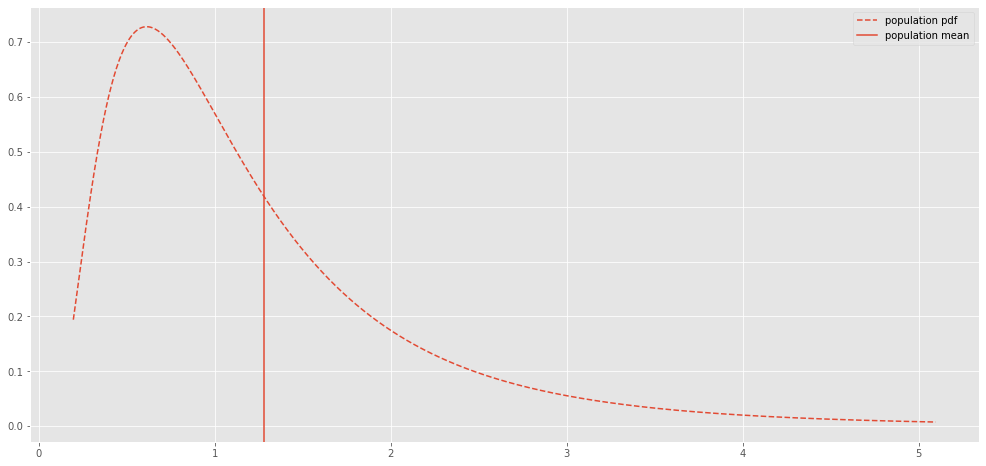

In [45]:
# # Генеральная совокупность - нормальное распределение со средним 100 и стандартным отклонением 20:
# population = stats.norm(loc=100, scale=20)

# Генеральная совокупность - логнормальное распределение со средним 100 и стандартным отклонением 20:
population = stats.lognorm(s=0.7)

plot_distribution(population, label='population');

In [46]:
# выборка - 200 записей
sample = population.rvs(size=200, random_state=42)

sample.mean(), sample.std()

(1.2077268997412829, 0.9129018181194878)

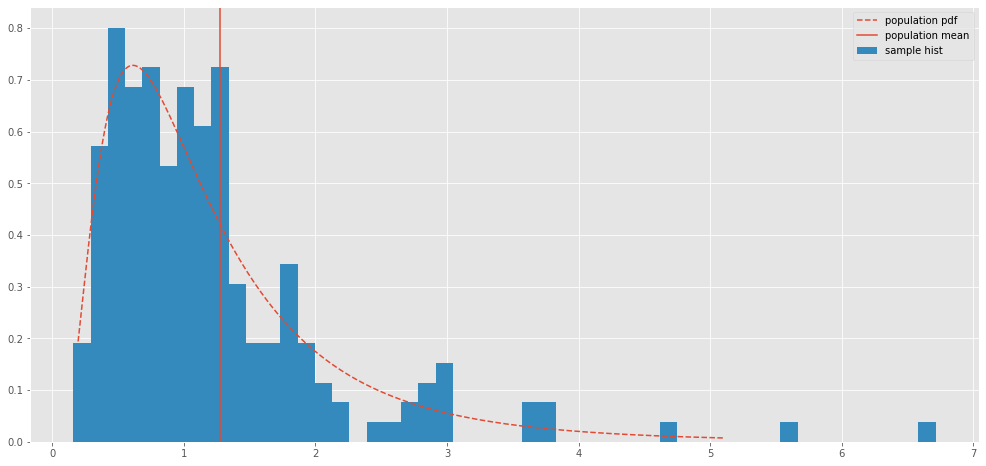

In [50]:
ax = plot_distribution(population, label='population')
ax.hist(sample, bins=50, density=True, label='sample hist')
ax.legend()
plt.show();

## Центральная предельная теорема

Вообще, она говорит о сумме. Типа пусть у нас есть n независимых одинаково распределённых случайных величин с мат. ожиданием $ \mu $ и дисперсией $ \sigma^{2} $ , тогда их сумма имеет нормальное распределение, близкое к $N(n\mu, n\sigma^{2})$.  

Но для нас важнее другое: если мы берем выборочное среднее этих n величин $\bar{X}_{n} = \frac{1}{N} \sum_{i=1}^n X_{i}$, то $\bar{X}_{n}$ имеет распределение, близкое к $N(\mu, \frac{\sigma^{2}}{n})$.  


Вот отсюда ноги растут у стандартной ошибки среднего, доверительных интервалов и т.п. Знакомые формулки: среднее равно $\mu$, дисперсия - $\frac{\sigma^{2}}{n})$, а значит стандартная ошибка - $\sqrt{\frac{\sigma^{2}}{n}} = \frac{\sigma}{\sqrt{n}}$.

Итак, еще раз: какова бы ни была форма распределения генеральной совокупности, выборочное распределение стремится к нормальному, а его дисперсия задается центральной предельной теоремой. Если мы набираем из генеральной совокупности (с мат. ожиданием $ \mu $ и стандартным отклонением $ \sigma $) сэмплы размера n, то средние этих выборок распределятся нормально вокруг $ \mu $ со стандартным отклонением $\frac{\sigma}{\sqrt{n}}$

In [51]:
def plot_central_limit_theorem(general_distribution, samples_n, experiments_count):
    """"""
    experiments_means = []
    
    for _ in range(experiments_count):
        sample = general_distribution.rvs(size=samples_n) # берем сэмпл размера samples_n из general_distribution
        experiments_means.append(np.mean(sample)) # добавляем выборочное среднее этого сэмпла в experiments_means
        
    # general distribution
    general_x = np.linspace(general_distribution.ppf(0.01), general_distribution.ppf(0.99), 100)
    general_y = general_distribution.pdf(general_x)
        
    # theoretical distribution
    theoretical_distribution = stats.norm(
        general_distribution.mean(),
        general_distribution.std()/samples_n**(1/2)
    )
    
    theoretical_x = np.linspace(theoretical_distribution.ppf(0.01), theoretical_distribution.ppf(0.99), 100)
    theoretical_y = theoretical_distribution.pdf(theoretical_x)
    
    # plots
    ax = plt.axes()
    ax.plot(general_x, general_y, label='general distribution pdf')
    ax.plot(theoretical_x, theoretical_y, label='theoretical distribution pdf')
    ax.hist(experiments_means, density=True, label='experiments hist')
    ax.legend()
    plt.show();

interact(
    plot_central_limit_theorem, 
    general_distribution=fixed(stats.lognorm(0.7)),
    samples_n=30,
    experiments_count=50
);

interactive(children=(IntSlider(value=30, description='samples_n', max=90, min=-30), IntSlider(value=50, descr…

In [25]:
SE = sample.std() / np.sqrt(len(sample))

CI_distridution = stats.norm(loc=sample.mean(), scale=SE)

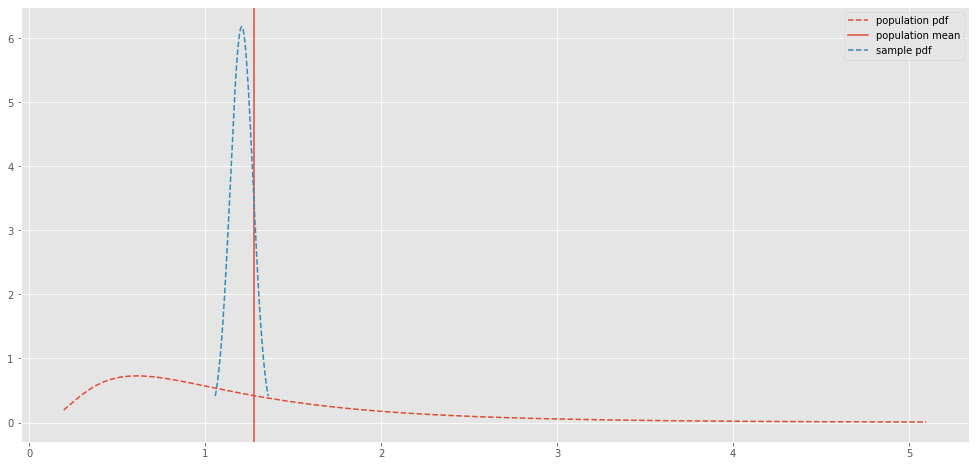

In [52]:
ax = plot_distribution(population, label='population')
ax = plot_distribution(CI_distridution, ax=ax, plot_mean=False, label='sample')

plt.show();

## батчи

Первый шаг на пути к бутстрапу: вместо аналитики со стандартной ошибки мы можем побить наш сэмпл на батчи, посмотреть их средние, и из этого построить распределение средних:

In [53]:
n_batches = 20

batches_df = pd.DataFrame(
    np.split(
        shuffle(sample, random_state=42), # сначала перемешаем на всякий случай
        n_batches
    )
).T

batches_df.shape # n_batches колонок. Каждая колонка - значения нашего батча.

(10, 20)

In [54]:
CI_sample = batches_df.mean() # а вот средние по батчам

CI_sample

0     0.742251
1     1.326251
2     1.523084
3     1.455646
4     1.064276
5     1.127766
6     1.166692
7     1.487017
8     1.108649
9     1.426225
10    0.868895
11    1.041561
12    1.230581
13    1.466154
14    1.159392
15    0.978713
16    1.415907
17    0.805647
18    0.818704
19    1.941127
dtype: float64

In [55]:
# мы теперь можем смотреть на статистики этой выборки средних для доверительных интервалов
CI_sample.mean(), CI_sample.std()

(1.2077268997412829, 0.30040127253274806)

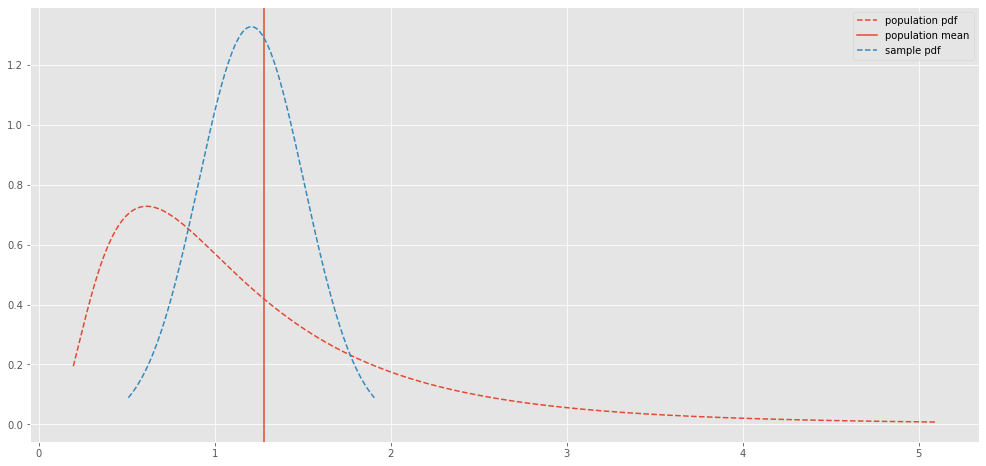

In [56]:
ax = plot_distribution(population, label='population')
ax = plot_distribution(
    stats.norm(
        loc=CI_sample.mean(), 
        scale=CI_sample.std()
    ), 
    ax=ax, 
    plot_mean=False, 
    label='sample'
)

plt.show();

## classic bootstrap

Это просто другой способ набрать батчи

In [57]:
n_bootstraps = 10000

In [58]:
bootstrap_samples_means = []

for i in range(n_bootstraps):
    bootstrap_sample = resample(
        sample, 
        replace=True, 
        n_samples=len(sample), # по сколько объектов в одном bootstrap_sample делать
        random_state=i # если сделать один random_state на все сэмплы, они все будут одинаковыми
    )
    
    bootstrap_samples_means.append(bootstrap_sample.mean())
    
bootstrap_samples_means = pd.Series(bootstrap_samples_means)

bootstrap_samples_means.mean(), bootstrap_samples_means.std()

(1.2078235153630976, 0.06493469703180055)

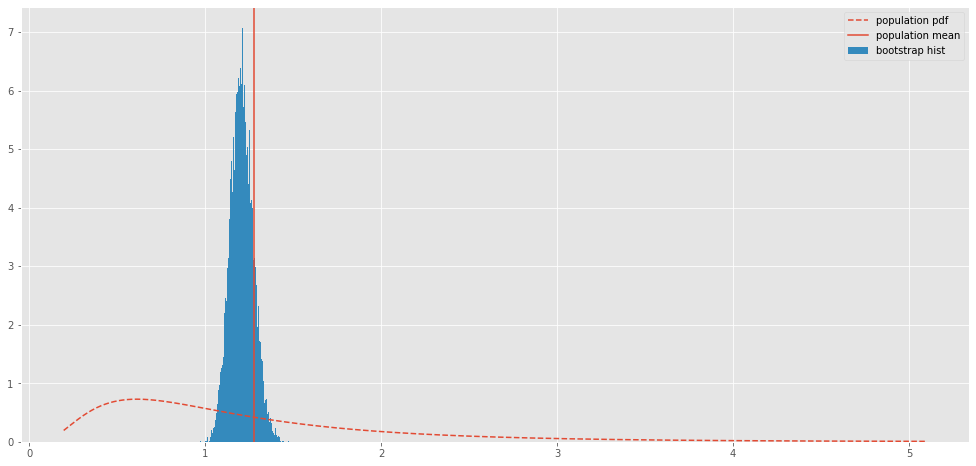

In [59]:
ax = plot_distribution(population, label='population')
ax.hist(bootstrap_samples_means, bins=100, density=True, label='bootstrap hist')
ax.legend()
plt.show();

## approx

Аппроксимации дают нам представление о том, как много раз каждая запись попадет в итоговый набор выборок.

### binomial

In [60]:
n = len(sample)

result = np.zeros(n)

for j in range(n_bootstraps):
    bootstrap_sample = []
    for i in range(n):
        np.random.seed(i*j) # если сделать один random_state на все сэмплы, они все будут одинаковыми
        
        n_repetition = np.random.binomial(n, 1/n) # кол-во повторений данного эл-та
        
        bootstrap_sample.append(n_repetition)
    
    result += np.array(bootstrap_sample)
    
print('кол-во объектов в итоге:', np.sum(result), 'а в оригинале - ', n * n_bootstraps)

кол-во объектов в итоге: 2004921.0 а в оригинале -  2000000


### poissson

In [61]:
result = np.zeros(n_bootstraps)

for i in range(n):
    np.random.seed(i) # если сделать один random_state на все сэмплы, они все будут одинаковыми
    result += np.random.poisson(1, n_bootstraps)
    
print('кол-во объектов в итоге:', np.sum(result), 'а в оригинале - ', n * n_bootstraps)

кол-во объектов в итоге: 1998810.0 а в оригинале -  2000000


В общем, круто: быстро и просто. Но не позволяет оценить ЛЮБЫЕ метрики. Только те, где нам важно кол-во каких-то вещей. Типа чтоб мы могли просуммировать нужное кол-во раз.  

Можно попробовать с конверсиями поработать. 

А вообще, можно же не суммировать. А собирать матрицу. И она нам даст представление о наборе выборок: сколько раз какая запись куда входит. Так что это просто более быстрый способ собрать выборки.